<a href="https://colab.research.google.com/github/Sanianada/Tugas-2-NaiveBayesdanKNN/blob/main/Tugas_2_Naive_Bayes_dan_Neural_Netwoork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pemanggilan data
data = pd.read_csv("apple_quality.csv")

In [3]:
data.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

  Quality  
0    good  
1    good  
2     bad  
3    good  
4    good

In [4]:
data.tail(5)

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
3995  0.137784     bad  
3996  1.854235    good  
3997 -1.334611     bad  
3998 -2.229720    good  
3999  1.599796    good

In [5]:
#melihat statistika deskriptif
data.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness      Acidity  
count  4000.000000  4000.000000  
mean      0.498277     0.076877  
std       1.874427     2.110270  
min      -5.864599    -7.010538  
25%      -0.771677    -1.377424  
50%       0.503445     0.022609  
75%       1.766212     1.510493  
max       7.237837     7.404736

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


# Deteksi Missing Value

In [7]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv("apple_quality.csv")

# Melihat ukuran data
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Melihat jumlah data duplikat
print(f"Duplicates: {df.duplicated().sum()}")

# Melihat total nilai yang hilang
print(f"Total missing values: {df.isna().sum().sum()}")

# Opsional: Menampilkan missing value per kolom
print("\nMissing values per column:")
print(df.isna().sum())

Rows: 4000, Columns: 8
Duplicates: 0
Total missing values: 0

Missing values per column:
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [8]:
data.isnull()

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
0     False   False      False        False      False     False    False   
1     False   False      False        False      False     False    False   
2     False   False      False        False      False     False    False   
3     False   False      False        False      False     False    False   
4     False   False      False        False      False     False    False   
...     ...     ...        ...          ...        ...       ...      ...   
3995  False   False      False        False      False     False    False   
3996  False   False      False        False      False     False    False   
3997  False   False      False        False      False     False    False   
3998  False   False      False        False      False     False    False   
3999  False   False      False        False      False     False    False   

      Quality  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
3995    False  
3996    False  
3997    False  
3998    False  
3999    False  

[4000 rows x 8 columns]

In [9]:
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
#mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(0)

Berdasarkan output summarize tersebut, tidak terdapat kolom yang mengandung missing values (nilai kosong atau null) pada dataset. Setiap kolom seperti A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, hingga Quality memiliki nilai nol pada jumlah data yang hilang.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Quality'] = le.fit_transform(data['Quality'])

In [12]:
data.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

   Quality  
0        1  
1        1  
2        0  
3        1  
4        1

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 250.1 KB


Dilakukan encoding pada kolom target Quality yang semula bertipe kategorikal menggunakan LabelEncoder dari library scikit-learn. Proses encoding ini dilakukan agar nilai kategorikal pada kolom Quality dapat diubah menjadi bentuk numerik, karena algoritma seperti Naive Bayes hanya dapat memproses data numerik.

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')


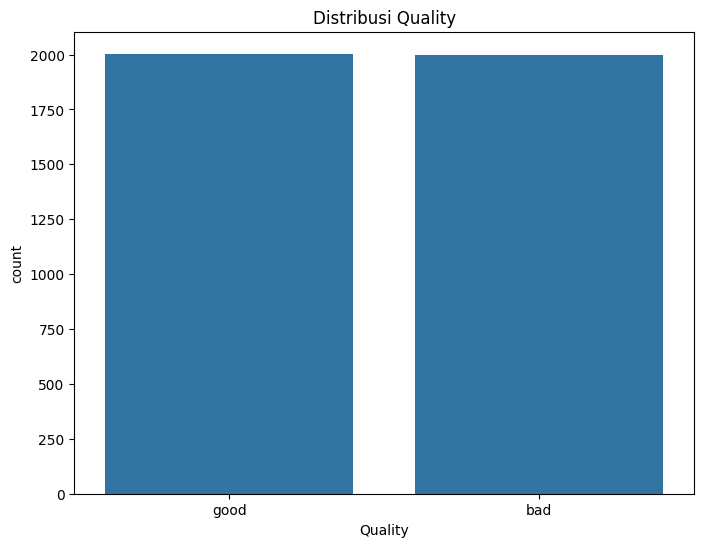

In [14]:
# 1. Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Baca file CSV
Data = pd.read_csv('apple_quality.csv')  # pastikan nama file sesuai

# 3. Cek kolom untuk memastikan 'Quality' ada
print(Data.columns)

# 4. Buat plot countplot
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='Quality')
plt.title('Distribusi Quality')
plt.show()


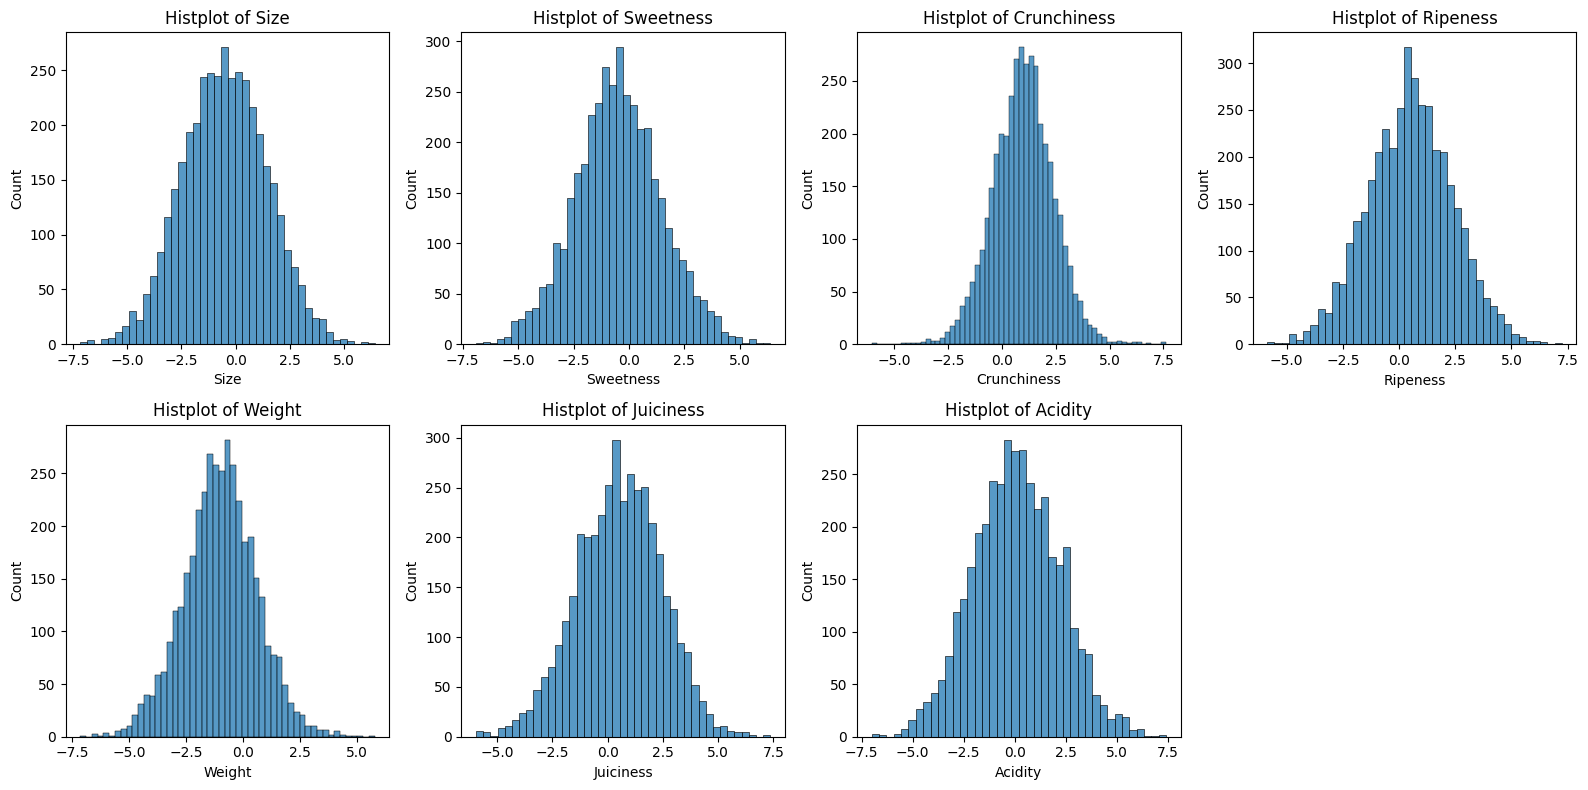

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat histogram untuk berbagai fitur
plt.figure(figsize=(16, 8))

# Histogram Size
plt.subplot(2, 4, 1)
sns.histplot(x=Data['Size'])
plt.title('Histplot of Size')

# Histogram Sweetness
plt.subplot(2, 4, 2)
sns.histplot(x=Data['Sweetness'])
plt.title('Histplot of Sweetness')

# Histogram Crunchiness
plt.subplot(2, 4, 3)
sns.histplot(x=Data['Crunchiness'])
plt.title('Histplot of Crunchiness')

# Histogram Ripeness
plt.subplot(2, 4, 4)
sns.histplot(x=Data['Ripeness'])
plt.title('Histplot of Ripeness')

# Histogram Weight
plt.subplot(2, 4, 5)
sns.histplot(x=Data['Weight'])
plt.title('Histplot of Weight')

# Histogram Juiciness
plt.subplot(2, 4, 6)
sns.histplot(x=Data['Juiciness'])
plt.title('Histplot of Juiciness')

# Histogram Acidity
plt.subplot(2, 4, 7)
sns.histplot(x=Data['Acidity'])
plt.title('Histplot of Acidity')

plt.tight_layout()
plt.show()

# Cek Penanganan Outlier

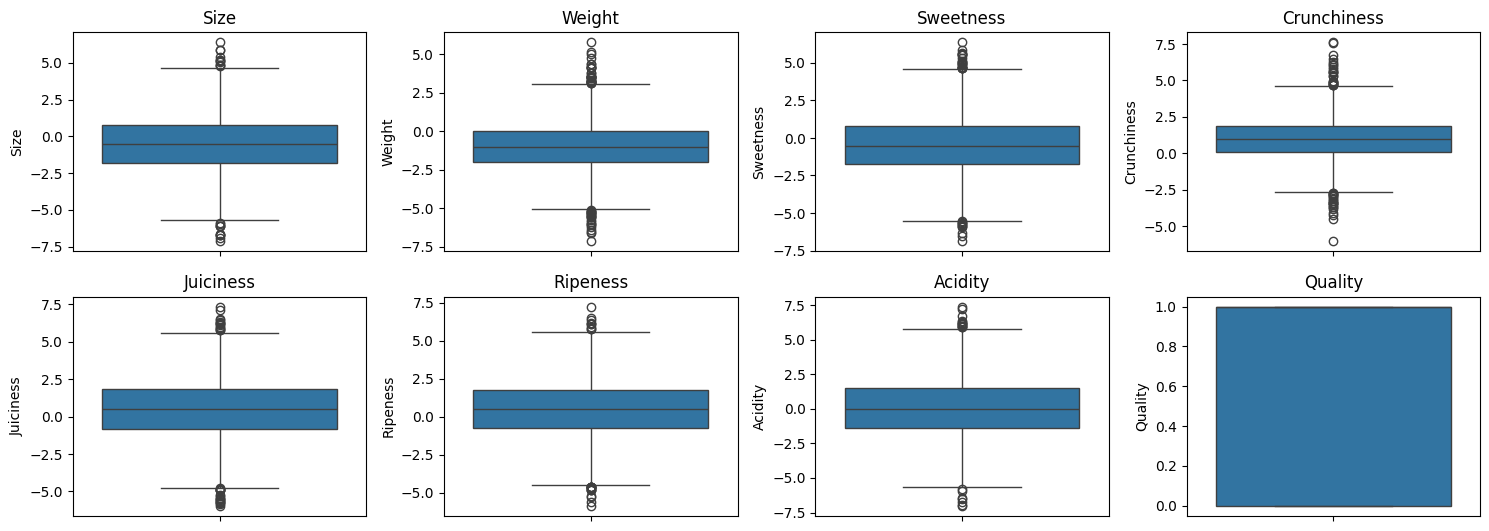

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness',
            'Juiciness', 'Ripeness',
            'Acidity', 'Quality']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Kuartil 1
    Q3 = data[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")

Size: 22 outliers
Weight: 54 outliers
Sweetness: 32 outliers
Crunchiness: 47 outliers
Juiciness: 32 outliers
Ripeness: 24 outliers
Acidity: 20 outliers
Quality: 0 outliers


In [18]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

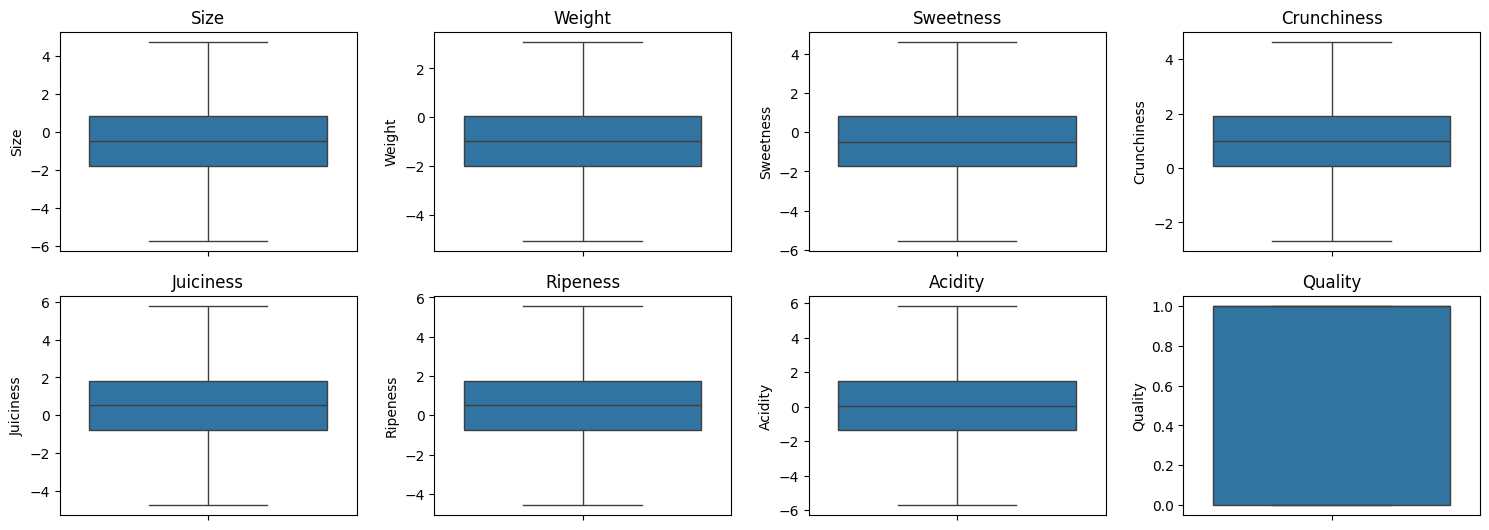

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness',
            'Juiciness', 'Ripeness',
            'Acidity', 'Quality']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
count_values = data['Quality'].value_counts()
count_values

Quality
1.0    2004
0.0    1996
Name: count, dtype: int64

In [21]:
# Menghitung rata-rata berdasarkan nilai 'Quality'
mean_by_quality = data.groupby('Quality').mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Quality'
print(mean_by_quality)

             Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
Quality                                                                    
0.0     -0.972432 -0.991492  -0.957797     1.000938   0.013507  0.993097   
1.0     -0.034834 -0.990966   0.011363     0.967517   1.010753  0.005082   

          Acidity  
Quality            
0.0      0.092712  
1.0      0.060631  


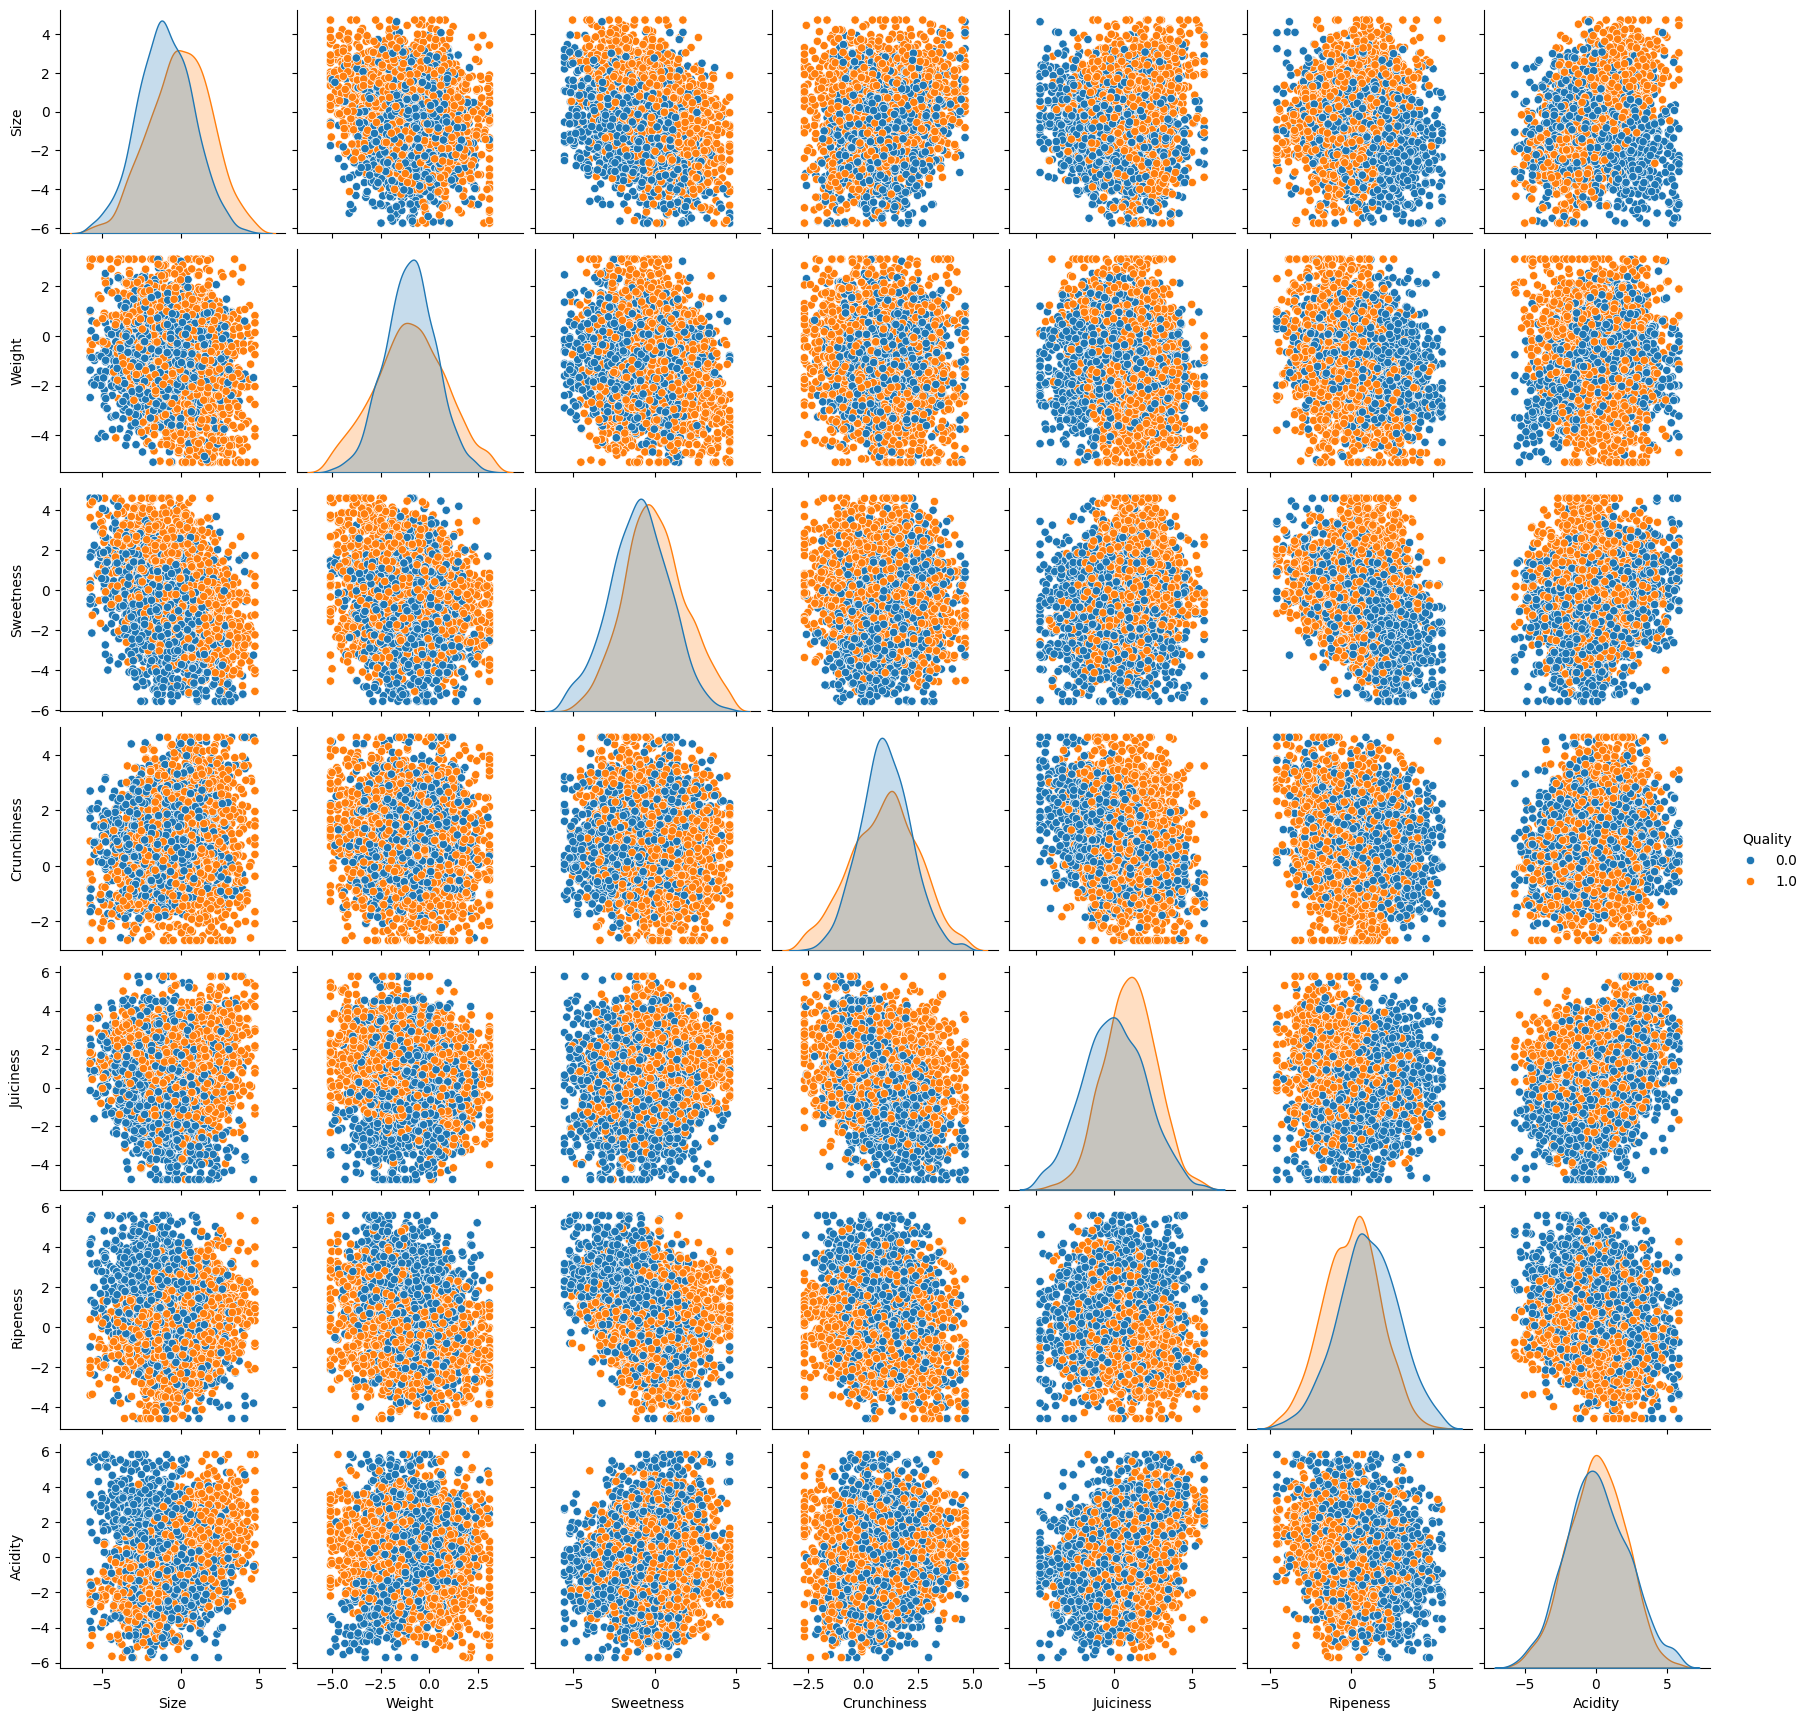

In [22]:
#visualisasi. warna dibedakan berdasarkan qualitynya apakah good atau bad
sns.pairplot(data, vars=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity'], hue='Quality')

In [23]:
import seaborn as sns
import pandas as pd


# Menghitung korelasi antara setiap variabel dengan 'Quality'
correlation_with_quality = data.corr()['Quality'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Quality'
print(correlation_with_quality)


Quality        1.000000
Juiciness      0.260135
Sweetness      0.250890
Size           0.244522
Weight         0.000167
Acidity       -0.007634
Crunchiness   -0.012204
Ripeness      -0.264687
Name: Quality, dtype: float64


In [24]:
#memisahkan data menjadi variabel x dan y
X=data.drop(['Quality'], axis=1)
y=data['Quality']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.46674658 0.64772624 0.62319968 ... 0.61958483 0.20775334 0.71450698]
 [0.49856003 0.52984161 0.45584586 ... 0.45640685 0.44182494 0.56156995]
 [0.45702851 0.74243102 0.33065221 ... 0.39289952 0.51608172 0.50462629]
 ...
 [0.53676904 0.67418597 0.29366359 ... 0.36733978 0.64337096 0.54554461]
 [0.17105929 1.         0.50623235 ... 0.40399148 0.38319438 0.31707941]
 [0.65590748 0.63608715 0.58120149 ... 0.64248394 0.23603994 0.60374348]]


# Naive Bayes

Naive Bayes merupakan salah satu algoritma klasifikasi yang sederhana namun cukup efektif, terutama dalam kasus klasifikasi teks atau data dengan dimensi besar. Pemodelan dengan algoritma Naive Bayes biasanya diawali dengan melakukan import library yang dibutuhkan, seperti GaussianNB dari pustaka sklearn.naive_bayes. Setelah itu, data dipersiapkan dengan membaginya menjadi dua bagian: data latih (training data) dan data uji (testing data) menggunakan fungsi train_test_split. Proses ini penting agar model dapat dilatih dan kemudian diuji kemampuannya terhadap data yang belum pernah dilihat sebelumnya. Selanjutnya, model Naive Bayes diinisialisasi, dan pelatihan dilakukan dengan memanggil metode fit() yang akan menghitung probabilitas dari setiap kelas berdasarkan fitur-fitur input. Naive Bayes bekerja dengan prinsip probabilistik dan mengasumsikan bahwa setiap fitur bersifat independen terhadap fitur lainnya, yang disebut dengan asumsi "naive". Setelah model dilatih, prediksi dilakukan terhadap data uji menggunakan metode predict(), dan hasilnya dievaluasi menggunakan metrik seperti akurasi. Meskipun model ini memiliki asumsi yang cukup kuat dan sederhana, performanya tetap kompetitif pada banyak dataset, khususnya jika distribusi data mendekati normal atau tidak terlalu kompleks.

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [28]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.7534375

In [30]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.7475



Classification Report:

              precision    recall  f1-score   support

         bad       0.94      0.96      0.95       401
        good       0.95      0.94      0.95       399

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.95      0.95      0.95       800



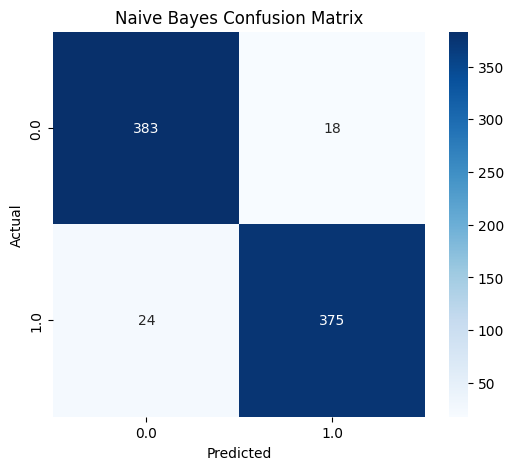

In [58]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Neural Network

Neural Network, khususnya Multilayer Perceptron (MLP), adalah algoritma pembelajaran mesin yang terinspirasi dari cara kerja otak manusia. Dalam pemodelan Neural Network menggunakan MLPClassifier dari pustaka sklearn.neural_network, langkah pertama adalah mengimpor library yang diperlukan. Setelah itu, seperti pada algoritma lainnya, data dibagi menjadi data latih dan data uji untuk memastikan bahwa proses pelatihan dan evaluasi berjalan dengan adil. Model kemudian diinisialisasi dengan menentukan parameter seperti jumlah neuron dalam hidden layer dan jumlah maksimum iterasi (max_iter). Hidden layer merupakan bagian penting dari Neural Network yang memungkinkan model untuk mempelajari hubungan non-linear dan kompleks antar fitur dalam data. Proses pelatihan dilakukan dengan metode fit(), yang melibatkan algoritma backpropagation untuk menyesuaikan bobot-bobot pada jaringan berdasarkan error yang dihasilkan. Setelah pelatihan selesai, model digunakan untuk melakukan prediksi terhadap data uji, dan hasilnya dievaluasi dengan metrik seperti akurasi. Neural Network umumnya memiliki performa yang lebih tinggi dibandingkan algoritma klasik ketika dihadapkan pada data yang kompleks, namun membutuhkan waktu pelatihan yang lebih lama dan sumber daya komputasi yang lebih besar.

In [33]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 500]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(100,), (100, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300, 500]})

Pemilihan parameter pada GridSearchCV bertujuan untuk menemukan konfigurasi terbaik model Neural Network. Parameter hidden_layer_sizes diuji dengan (100,) dan (100, 50) untuk membandingkan arsitektur satu dan dua lapisan tersembunyi. learning_rate_init dipilih antara 0.001 dan 0.01 untuk melihat pengaruh kecepatan belajar, dan max_iter diatur pada 300 dan 500 untuk memastikan model cukup waktu belajar. Kombinasi ini membantu mencari performa optimal dari model.

In [34]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 500}


In [35]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.001,max_iter=500)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       422
         1.0       0.84      0.86      0.85       378

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



In [38]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.858

In [56]:
from sklearn.neural_network import MLPClassifier

best_clf = MLPClassifier(
    hidden_layer_sizes=(100,),
    learning_rate_init=0.001,
    max_iter=300,
    random_state=100
)

best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


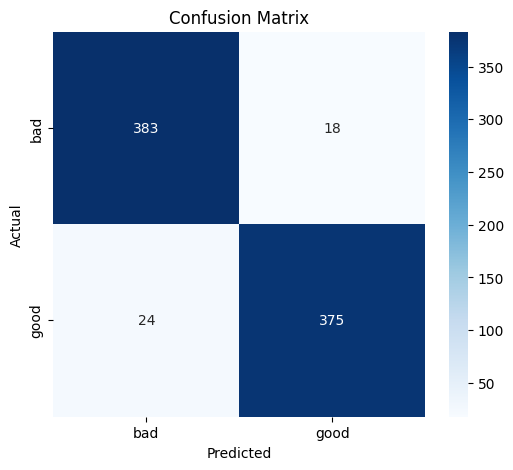

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=best_clf.classes_,
    yticklabels=best_clf.classes_
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

Model KNN dibentuk menggunakan KNeighborsClassifier dengan parameter n_neighbors=5, yang berarti model akan melihat 5 tetangga terdekat untuk menentukan kelas suatu data. Model kemudian dilatih dengan data pelatihan yang telah diskalakan (X_train_scaled) dan label target (y_train). Setelah pelatihan selesai, prediksi dilakukan terhadap data uji (X_test_scaled), dan hasilnya dibandingkan dengan label asli menggunakan classification_report untuk mengetahui metrik evaluasi seperti precision, recall, dan f1-score. Akurasi model juga dihitung dan ditampilkan untuk menilai performa keseluruhan. Pendekatan ini menunjukkan bahwa KNN dapat digunakan secara efektif untuk klasifikasi data kualitas apel jika dilakukan dengan praproses yang tepat.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [62]:
y_pred = knn.predict(X_test_scaled)

In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

         bad       0.91      0.90      0.90       401
        good       0.90      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Accuracy: 0.90


In [64]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.902

Confusion Matrix:
 [[360  41]
 [ 37 362]]


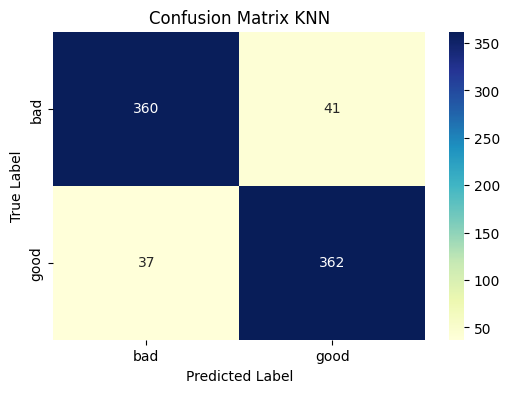

In [65]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Perbandingan Hasil Klasifikasi

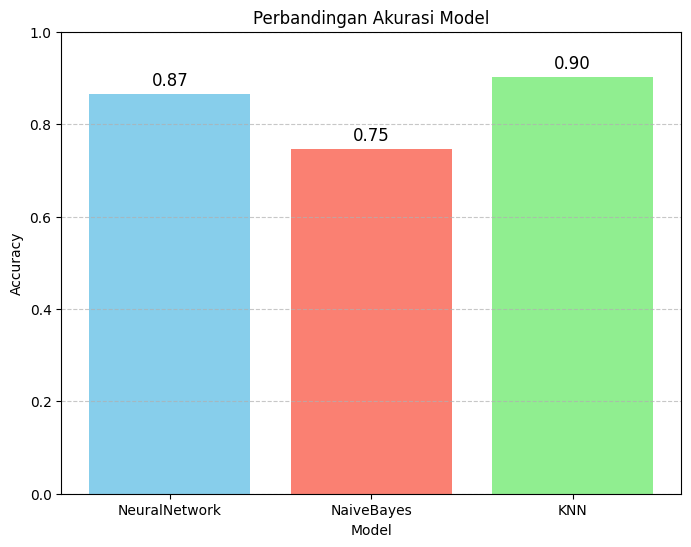

In [59]:
import matplotlib.pyplot as plt

model_names = ['NeuralNetwork', 'NaiveBayes', 'KNN']
accuracies = [0.866, 0.747, 0.901]

plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'lightgreen'])

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{accuracy:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # Skala akurasi 0 sampai 1
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Opsional: biar lebih rapi

plt.show()

Berdasarkan hasil evaluasi terhadap tiga model klasifikasi yang digunakan untuk memprediksi kualitas apel, diperoleh bahwa model K-Nearest Neighbor (KNN) memberikan performa terbaik dengan akurasi sebesar 90%. Model ini mampu mengklasifikasikan data dengan sangat baik, menunjukkan bahwa pendekatan berbasis kemiripan antar data efektif dalam konteks ini. Sementara itu, model Neural Network menyusul dengan akurasi sebesar 87%, yang juga menunjukkan kinerja yang baik meskipun sedikit di bawah KNN. Di sisi lain, model Naive Bayes mencatatkan akurasi paling rendah, yaitu 75%. Hal ini kemungkinan disebabkan oleh asumsi independensi antar fitur pada Naive Bayes yang tidak sepenuhnya sesuai dengan karakteristik data kualitas apel. Secara keseluruhan, KNN dapat disimpulkan sebagai model yang paling tepat digunakan untuk memprediksi kualitas apel pada dataset ini.